# Proyecto Corte 1 con metodología CRISP-DM

### Grupo 5: Laura Franco, Martin Jerez, Sebastián Ulloa & Juliana Espinel

In [2]:
import matplotlib
import sklearn
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Scikit-learn:", sklearn.__version__)

NumPy: 2.3.1
Pandas: 2.2.3
Matplotlib: 3.10.0
Scikit-learn: 1.7.1


## 1. Comprensión del negocio
¿Cómo varía la popularidad según año de lanzamiento en varias plataformas (Spotify y YouTube)?

**Objetivo general:** Entender como ha cambiado la popularidad de las canciones lanzadas en Spotify y Youtube a lo largo de los años para identificar patrones que influyan en el exito de futuros lanzamientos.

**Preguntas especificas:**
- ¿Qué años han tenido más reproducciones o vistas en ambas plataformas?
- ¿Hay alguna tendencia que indique que la popularidad de las canciones en cada plataforma ha estado aumentado o disminuyendo con el tiempo?
- ¿Qué plataforma tiene una mayor popularidad?
- ¿Qué canciones son las más populares en cada plataforma y de que año son?

## 2. Comprensión de los datos
Importar el dataset como un dataframe y explorar el estado inicial de los datos. Muestra información general y las primeras filas de la tabla.

In [3]:
#se carga el archivo csv
archivo = r"Datos_proyecto_C1_Spotify_Youtube.csv"

#se define el data frame
df = pd.read_csv(archivo)

#print de las primeras rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## 3. Preparación de los datos
Limpieza, integración,transformación, reducción de ruido, selección, división, creación de nuevas variables y extracción de información adicional.

In [4]:
# Eliminar duplicados basados en artista + track
df = df.drop_duplicates(subset=["Artist", "Track"])

# Eliminar registros sin métricas de popularidad (Streams y Views nulos)
df = df.dropna(subset=["Stream", "Views"])

# Asegurar tipos numéricos correctos
for col in ["Stream", "Views", "Likes", "Comments"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


# Normalización logarítmica para métricas de popularidad
df["Stream_log"] = np.log1p(df["Stream"])
df["Views_log"] = np.log1p(df["Views"])
df["Likes_log"] = np.log1p(df["Likes"].fillna(0))
df["Comments_log"] = np.log1p(df["Comments"].fillna(0))

# Eliminar outliers extremos (Streams > 5e9 o Views > 1e10)
df = df[(df["Stream"] < 5e9) & (df["Views"] < 1e10)]

df_reduced = df[[
    "Artist", "Track", "Album",
    "Stream", "Views", "Likes", "Comments",
    "Stream_log", "Views_log", "Likes_log", "Comments_log"
]].copy()


#### Creación de una nueva columna Year:
Se extrae el año de lanzamiento de cada canción a partir de otras columnas como "Album" o "Track" y muestra las primeras filas del df_reduced ya con la columna añadida.

In [ ]:
# ==============================
# FUNCIONES AUXILIARES
# ==============================
def extract_year(text):
    """Extrae un año en formato 19xx o 20xx de un texto."""
    if pd.isna(text):
        return None
    match = re.search(r"(19[5-9][0-9]|20[0-2][0-9])", str(text))
    if match:
        return int(match.group(0))
    return None

# ==============================
# EXTRAER AÑOS
# ==============================

# Año desde Spotify (principalmente en Album o Track)
df["Year_spotify"] = df["Album"].apply(extract_year)
df.loc[df["Year_spotify"].isna(), "Year_spotify"] = df["Track"].apply(extract_year)

# Año desde YouTube (Title o Description)
df["Year_youtube"] = df["Title"].apply(extract_year)
df.loc[df["Year_youtube"].isna(), "Year_youtube"] = df["Description"].apply(extract_year)

# ==============================
# CREAR COLUMNA FINAL YEAR
# ==============================
def choose_year(row):
    if pd.notna(row["Year_spotify"]) and pd.notna(row["Year_youtube"]):
        # Si coinciden, usar ese año
        if row["Year_spotify"] == row["Year_youtube"]:
            return row["Year_spotify"]
        else:
            # Si difieren, damos prioridad a Spotify
            return row["Year_spotify"]
    elif pd.notna(row["Year_spotify"]):
        return row["Year_spotify"]
    elif pd.notna(row["Year_youtube"]):
        return row["Year_youtube"]
    else:
        return None


# Crear columna final Year
df_reduced["Year"] = df.apply(choose_year, axis=1)

# ==============================
# IMPUTACIÓN
# ==============================
def _imputar_por_artista(s):
    s_no_na = s.dropna()
    if len(s_no_na) > 0:
        mode = s_no_na.mode()
        if not mode.empty:
            return s.fillna(int(mode.iloc[0]))
        return s.fillna(int(np.nanmedian(s_no_na)))
    return s


df_reduced["Year"] = df_reduced.groupby("Artist")["Year"].transform(_imputar_por_artista)


df_reduced["Year"] = pd.to_numeric(df_reduced["Year"], errors="coerce").astype("Int64")

df_reduced.loc[df_reduced["Year"] > 2025, "Year"] = pd.NA
# ==============================
# RESULTADO
# ==============================
df_reduced.head()


,Artist,Track,Album,Stream,Views,Likes,Comments,Stream_log,Views_log,Likes_log,Comments_log,Year_spotify,Year_youtube,Year
0,Gorillaz,Feel Good Inc.,Demon Days,1.040235e+09,693555221.0,6220896.0,169907.0,20.762712,20.357341,15.643425,12.043012,NaN,NaN,2005
1,Gorillaz,Rhinestone Eyes,Plastic Beach,3.100837e+08,72011645.0,1079128.0,31003.0,19.552353,18.092338,13.891665,10.341872,NaN,2010.0,2010
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07,8435055.0,282142.0,7399.0,17.959652,15.947907,12.550169,8.909235,NaN,NaN,2005
3,Gorillaz,On Melancholy Hill,Plastic Beach,4.346636e+08,211754952.0,1788577.0,55229.0,19.890083,19.170940,14.396931,10.919262,NaN,2010.0,2010
4,Gorillaz,Clint Eastwood,Gorillaz,6.172597e+08,618480958.0,6197318.0,155930.0,20.240800,20.242777,15.639627,11.957169,NaN,2001.0,2001


Se necesita saber todos los años que estan registrados en la base de datos 

In [6]:
print(df_reduced["Year"].unique())


<IntegerArray>
[2005, 2010, 2001, 2022, 1999, 2006, 2002, 2000, 2003, 1998, 2023, 2008, 2014,
 2011, 2015, 2013, 1997, 2004, 1995, 1980, 2009, 2020, 1982, 1979, 2012, 1996,
 2019, 2016, 2018, 2017, 2021, 1968, 1969, 1993, 1975, 1974, 1967, 1990, <NA>,
 1950, 1983, 1970, 1973, 2007, 1988, 1965, 1992, 1994, 1987, 1978, 1976, 1960,
 1977, 1989, 1984, 1986, 1972, 1981, 1991, 1954, 1985, 1971, 1966, 1956, 1951,
 1964, 1958, 1961, 1963, 1962, 1959, 1957, 1953, 1952, 1955, 2025]
Length: 76, dtype: Int64


Se ejecuta el siguiente código para determinar cuántos valores nulos existen dentro la base de datos

In [64]:
# Número de registros originales
total_original = len(df_reduced)

# Eliminar los NaN en Year
df_reduced_clean = df_reduced.dropna(subset=["Year"])

# Número de registros después de borrar
total_limpio = len(df_reduced_clean)

# Cuántos se borraron
borrados = total_original - total_limpio

print("Total original:", total_original)
print("Total limpio:", total_limpio)
print("Registros borrados:", borrados)



Total original: 19614
Total limpio: 18039
Registros borrados: 1575


#### División de datos y muestra del tamaño de los nuevos dataframes:

In [65]:
# Spotify subset
df_spotify = df_reduced[["Artist", "Track", "Album", "Stream", "Stream_log"]].copy()

# YouTube subset
df_youtube = df_reduced[[
    "Artist", "Track", "Album",
    "Views", "Likes", "Comments",
    "Views_log", "Likes_log", "Comments_log"
]].copy()

# Resultados
print("Dataset limpio y reducido:", df_reduced.shape)
print("Subset Spotify:", df_spotify.shape)
print("Subset YouTube:", df_youtube.shape)

Dataset limpio y reducido: (19614, 15)
Subset Spotify: (19614, 5)
Subset YouTube: (19614, 9)


#### Muestra de las primeras columnas de los tres nuevos dataframes:

In [66]:
df_reduced.head()

,Artist,Track,Album,Stream,Views,Likes,Comments,Stream_log,Views_log,Likes_log,Comments_log,Year_spotify,Year_youtube,Year,Year_imp
0,Gorillaz,Feel Good Inc.,Demon Days,1.040235e+09,693555221.0,6220896.0,169907.0,20.762712,20.357341,15.643425,12.043012,NaN,NaN,2005,2005.0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,3.100837e+08,72011645.0,1079128.0,31003.0,19.552353,18.092338,13.891665,10.341872,NaN,2010.0,2010,2010.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07,8435055.0,282142.0,7399.0,17.959652,15.947907,12.550169,8.909235,NaN,NaN,2005,2005.0
3,Gorillaz,On Melancholy Hill,Plastic Beach,4.346636e+08,211754952.0,1788577.0,55229.0,19.890083,19.170940,14.396931,10.919262,NaN,2010.0,2010,2010.0
4,Gorillaz,Clint Eastwood,Gorillaz,6.172597e+08,618480958.0,6197318.0,155930.0,20.240800,20.242777,15.639627,11.957169,NaN,2001.0,2001,2001.0


In [33]:
print(df_reduced.columns)



Index(['Artist', 'Track', 'Album', 'Stream', 'Views', 'Likes', 'Comments',
       'Stream_log', 'Views_log', 'Likes_log', 'Comments_log', 'Year_spotify',
       'Year_youtube', 'Year'],
      dtype='object')


In [67]:
df_spotify.head()

,Artist,Track,Album,Stream,Stream_log
0,Gorillaz,Feel Good Inc.,Demon Days,1.040235e+09,20.762712
1,Gorillaz,Rhinestone Eyes,Plastic Beach,3.100837e+08,19.552353
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07,17.959652
3,Gorillaz,On Melancholy Hill,Plastic Beach,4.346636e+08,19.890083
4,Gorillaz,Clint Eastwood,Gorillaz,6.172597e+08,20.240800


In [68]:
df_youtube.head()

,Artist,Track,Album,Views,Likes,Comments,Views_log,Likes_log,Comments_log
0,Gorillaz,Feel Good Inc.,Demon Days,693555221.0,6220896.0,169907.0,20.357341,15.643425,12.043012
1,Gorillaz,Rhinestone Eyes,Plastic Beach,72011645.0,1079128.0,31003.0,18.092338,13.891665,10.341872
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),8435055.0,282142.0,7399.0,15.947907,12.550169,8.909235
3,Gorillaz,On Melancholy Hill,Plastic Beach,211754952.0,1788577.0,55229.0,19.170940,14.396931,10.919262
4,Gorillaz,Clint Eastwood,Gorillaz,618480958.0,6197318.0,155930.0,20.242777,15.639627,11.957169


In [69]:
df_reduced.isna().sum()

Artist              0
Track               0
Album               0
Stream              0
Views               0
Likes              67
Comments           96
Stream_log          0
Views_log           0
Likes_log           0
Comments_log        0
Year_spotify    18960
Year_youtube    10686
Year             1575
Year_imp         1575
dtype: int64

### 2. Comprensión de los datos
Aquí hay una pequeña iteración, ya que después de limpiar y extraer nuevos datos, es necesario explorar el nuevo dataframe (en este caso, agrupando la cantidad de reproducciones por año y con EDA).

In [27]:
# ==============================
# AGRUPAR POR AÑO
# ==============================
# Spotify
spotify_yearly = df_reduced.groupby("Year")["Stream_log"].mean()

# YouTube
youtube_yearly = df_reduced.groupby("Year")["Views_log"].mean()

In [ ]:
# ==============================
# EDA
# ==============================

# Estadísticas descriptivas


# Spotify
spotify_stats = df_reduced.groupby("Year")["Stream_log"].describe()

# YouTube
youtube_stats = df_reduced.groupby("Year")["Views_log"].describe()


stats_year = pd.concat([spotify_stats, youtube_stats], 
                       keys=["Spotify", "YouTube"], 
                       axis=1)


from IPython.display import display

display(stats_year)



Spotify                                                                   \
       count       mean       std        min        25%        50%        75%   
Year                                                                            
1950    38.0  19.036185  1.276114  15.340381  18.499840  19.271845  19.823622   
1951    14.0  17.868941  1.179318  16.115452  17.140663  17.737470  18.928246   
1952    10.0  17.091168  1.427181  15.040112  15.802089  17.892591  18.078925   
1953    10.0  15.729645  1.703498  13.015691  14.953095  15.512416  16.119887   
1954     9.0  17.415122  0.728669  16.211532  17.156002  17.513377  17.883484   
1955    24.0  16.893610  0.515900  15.916977  16.688682  16.824016  16.983553   
1956    24.0  17.371258  1.576862  12.885463  16.983010  17.520180  18.185017   
1957    15.0  17.399130  2.764492  12.387577  15.238436  18.510870  19.439611   
1958    35.0  17.561641  0.973170  14.988639  17.103566  17.381959  18.022659   
1959    24.0  16.548241  2.380027  11.546563  14.532583  17.400727  17.988200   
1960    29.0  17.015536  1.130406  14.398901  16.244305  17.117802  17.638603   
1961    41.0  17.178510  1.652203  14.418664  16.063901  16.691078  18.214928   
1962     8.0  16.754613  1.324216  15.045191  15.695096  16.852166  17.541791   
1963    44.0  17.199211  0.986400  15.076942  16.623882  17.226426  17.875856   
1964    49.0  17.407146  1.705733  13.461441  16.384857  17.866081  18.602301   
1965    89.0  15.383795  2.936906  10.566201  12.653281  15.976071  18.023958   
1966    55.0  17.263065  1.345461  13.856115  16.733791  17.279163  17.817426   
1967    51.0  17.905114  1.297404  15.451648  16.921835  17.638889  18.812939   
1968    49.0  18.472075  1.194360  15.642221  17.888719  18.655325  19.337967   
1969    35.0  17.300728  1.380538  13.360418  16.686841  17.579629  18.149354   
1970    58.0  18.088574  1.032522  14.482379  17.556432  18.229582  18.771767   
1971    53.0  17.271708  1.428401  14.112906  16.058193  17.332217  18.373102   
1972    52.0  17.347027  1.294964  14.343642  16.432593  17.234697  18.195254   
1973    74.0  17.490133  1.488513  13.358681  16.713274  17.558669  18.479435   
1974    52.0  18.029920  1.315194  15.062441  17.290048  17.998278  18.699690   
1975    67.0  17.471737  1.582739  13.990977  16.491630  17.464532  18.882178   
1976   204.0  17.312708  1.725128  10.832951  16.104717  17.334533  18.498611   
1977    76.0  17.295917  1.608428  13.405712  16.406398  17.561990  18.552331   
1978   149.0  17.375639  1.502539  12.293067  16.653385  17.376809  18.264955   
1979    83.0  17.860564  1.608298  11.609961  16.901363  18.008917  18.990608   
1980    76.0  17.824193  1.786119  12.853937  16.409413  18.086343  19.030905   
1981   108.0  16.254654  2.281300   9.722685  15.144756  16.845308  17.748419   
1982    67.0  17.389784  1.425183  14.898746  16.341447  17.270697  18.502075   
1983    58.0  17.090628  1.579552  10.865172  16.036336  17.215930  18.046501   
1984    91.0  17.177025  1.430959  14.562578  16.199914  17.211196  18.125966   
1985    67.0  17.831215  1.045724  15.652802  17.268493  17.714389  18.317286   
1986    87.0  17.145309  1.514365  12.619126  16.490754  17.499702  18.270616   
1987    91.0  17.563655  1.539388  13.843489  16.377858  17.594019  18.652330   
1988   119.0  17.687027  1.242539  13.632084  16.883981  17.550872  18.717403   
1989   100.0  17.758826  1.754379  12.518684  16.789079  17.809106  19.000374   
1990   111.0  17.519390  1.014328  15.324230  16.838821  17.541131  18.038200   
1991   123.0  17.512630  1.562763  12.217878  16.405356  17.452037  18.850234   
1992   148.0  17.230301  1.718691  10.473139  16.585626  17.723132  18.231591   
1993   150.0  17.403620  1.406383  11.631783  16.687354  17.426188  18.177272   
1994   153.0  17.715712  1.174670  14.731664  16.914557  17.720824  18.438416   
1995   121.0  17.085105  1.451418  12.029681  16.196917  17.118891  18.126837   
1996   176.0  17.500898  1.468733  1

## 4. Modelado

Se hace una regresión para revisar si se encuentra una tendencia en el comportamiento de la popularidad anual de cada plataforma. Además se calculan los diferentes errores para verificar si el modelo de aproximación es confiable.

In [ ]:
# ==============================
# Regresión lineal para Spotify
# ==============================

X_spotify = spotify_yearly.index.values.reshape(-1, 1)
y_spotify = spotify_yearly.values

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_spotify, y_spotify, test_size=0.2, random_state=42
)

# Entrenar modelo
model_spotify = LinearRegression()
model_spotify.fit(X_train, y_train)

# Predicciones en test
y_spotify_pred = model_spotify.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_spotify_pred)
mae = mean_absolute_error(y_test, y_spotify_pred)
rmse = mean_squared_error(y_test, y_spotify_pred)

print("Spotify")
print("R^2:", round(r2, 3))
print("MAE:", round(mae, 3))
print("RMSE:", round(rmse, 3))

R^2: -0.071
MAE: 0.62
RMSE: 0.672


In [ ]:
# ==============================
# Regresión lineal para Youtube
# ==============================

X_youtube = youtube_yearly.index.values.reshape(-1, 1)
y_youtube = youtube_yearly.values

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_youtube, y_youtube, test_size=0.2, random_state=42
)

# Entrenar modelo
model_youtube = LinearRegression()
model_youtube.fit(X_train, y_train)

# Predicciones en test
y_youtube_pred = model_youtube.predict(X_test)

# Métricas
r2 = r2_score(y_test, y_youtube_pred)
mae = mean_absolute_error(y_test, y_youtube_pred)
rmse = mean_squared_error(y_test, y_youtube_pred)

print("Youtube")
print("R^2:", round(r2, 3))
print("MAE:", round(mae, 3))
print("RMSE:", round(rmse, 3))

## 5. Evaluación

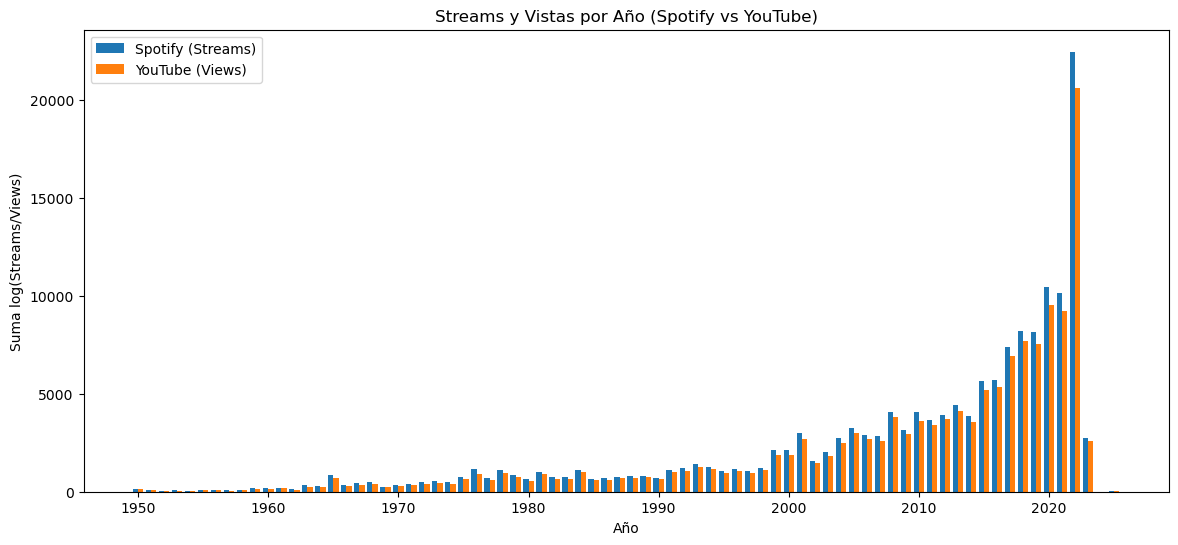

In [ ]:


streams_views_year = df_reduced.groupby("Year")[["Stream_log", "Views_log"]].sum().reset_index()

# Gráfico
plt.figure(figsize=(14,6))
plt.bar(streams_views_year["Year"] - 0.2, streams_views_year["Stream_log"], width=0.4, label="Spotify (Streams)")
plt.bar(streams_views_year["Year"] + 0.2, streams_views_year["Views_log"], width=0.4, label="YouTube (Views)")

plt.xlabel("Año")
plt.ylabel("Suma log(Streams/Views)")
plt.title("Streams y Vistas por Año (Spotify vs YouTube)")
plt.legend()
plt.show()


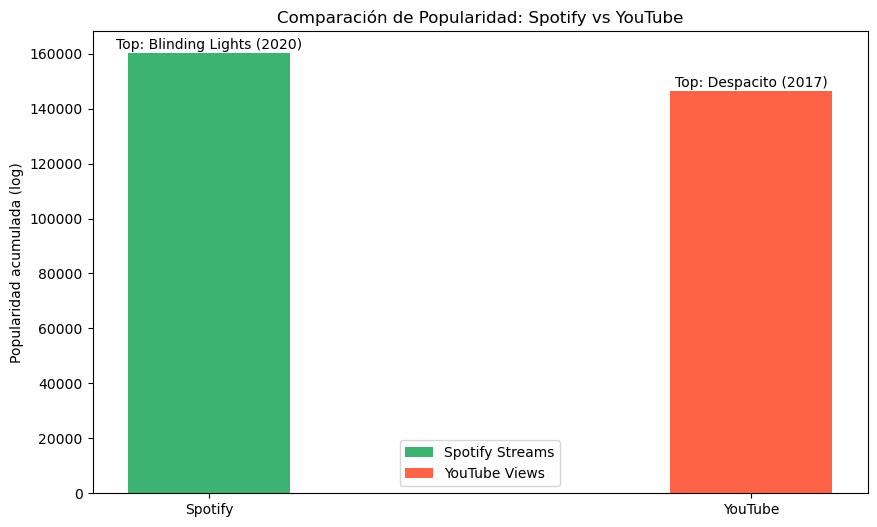

In [ ]:


total_spotify = df_reduced["Stream_log"].sum()
total_youtube = df_reduced["Views_log"].sum()


# Spotify
top_spotify = df_reduced.loc[df_reduced["Stream_log"].idxmax(), ["Track", "Year", "Stream_log"]]

# YouTube
top_youtube = df_reduced.loc[df_reduced["Views_log"].idxmax(), ["Track", "Year", "Views_log"]]



fig, ax = plt.subplots(figsize=(10,6))

ax.bar(["Spotify"], [total_spotify], color="mediumseagreen", label="Spotify Streams", width=0.3)
ax.bar(["YouTube"], [total_youtube], color="tomato", label="YouTube Views", width=0.3)


ax.text("Spotify", total_spotify*1.01, f"Top: {top_spotify['Track']} ({int(top_spotify['Year'])})", 
        ha="center", fontsize=10, color="black", rotation=0)

ax.text("YouTube", total_youtube*1.01, f"Top: {top_youtube['Track']} ({int(top_youtube['Year'])})", 
        ha="center", fontsize=10, color="black", rotation=0)


ax.set_ylabel("Popularidad acumulada (log)")
ax.set_title("Comparación de Popularidad: Spotify vs YouTube")
ax.legend()
plt.show()


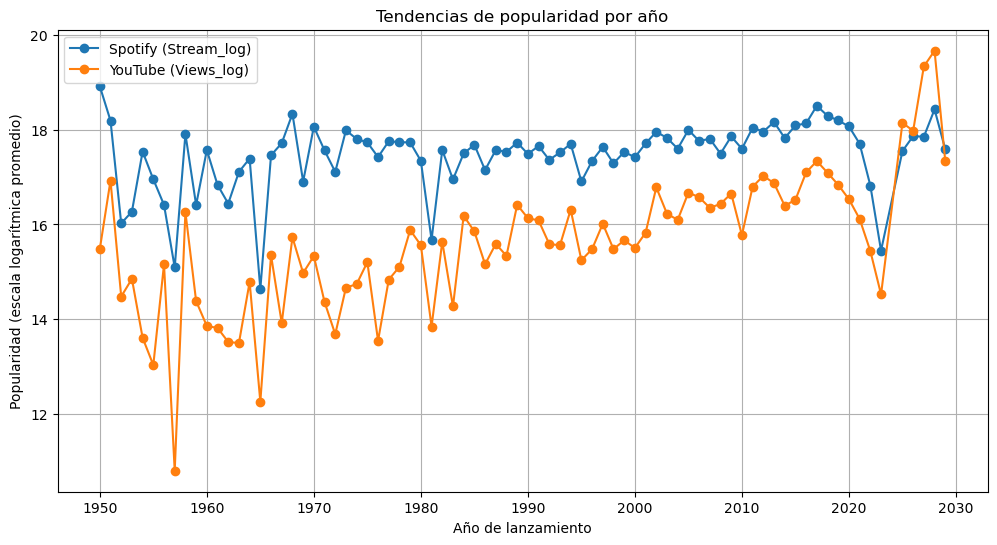

In [26]:

# ==============================
# GRAFICAR TENDENCIAS
# ==============================
plt.figure(figsize=(12,6))
plt.plot(spotify_yearly.index, spotify_yearly.values, marker="o", label="Spotify (Stream_log)")
plt.plot(youtube_yearly.index, youtube_yearly.values, marker="o", label="YouTube (Views_log)")

plt.title("Tendencias de popularidad por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Popularidad (escala logarítmica promedio)")
plt.legend()
plt.grid(True)
plt.show()
